# <center>Example pipeline of decoding_model_bids_fmri </center>
This notebook contains the example pipeline of decoding_model_bids. The pipeline leads you from .wav stimulus files and aligned fmri bold data to reconstruction accuracy of fitted decoding model.

## Project folder structure
The project assumes the following folder structure:
    /your_project_name/      
                      /code/audio2bidsstim/
                           /data_distribution/
                           /decoding/
                           
                      /raw data/stimuli/
                               /processed_stimuli/
                      /processed/
                      /lagged/
                      /decoding_data/

In the main directory of your project there shall be at 1 directory for code, 1 directory for raw data, 1 directory for preprocessed data and 1 directory for lagged data. 

In [5]:
%%bash 
cd /data/akitaitsev/data1/ 
ls -h

code
decoding_data
lagged
processed
raw_data


*The naming at this stage of work is a bit cumbersome and is likely to be changed and improved* 

- **raw_data**/stimuli contains wav_files you want to extract features from.

In [6]:
%%bash 
cd /data/akitaitsev/data1/raw_data/stimuli 
ls -h

0.wav
1.wav
2.wav
3.wav
4.wav
5.wav
6.wav
7.wav


- **raw_data**/processed_stimuli contains feature representations json files (parameters and metadata) produced by *wav_fiels_to_bids_tsv.py* called by *run_feature_extraction.sh*

In [7]:
%%bash 
cd /data/akitaitsev/data1/raw_data/processed_stimuli/ 
ls -h

task-aomovie_run-1_stim_description.json
task-aomovie_run-1_stim_mps.png
task-aomovie_run-1_stim_parameters.json
task-aomovie_run-1_stim_spectrogram.png
task-aomovie_run-1_stim.tsv.gz
task-aomovie_run-2_stim_description.json
task-aomovie_run-2_stim_mps.png
task-aomovie_run-2_stim_parameters.json
task-aomovie_run-2_stim_spectrogram.png
task-aomovie_run-2_stim.tsv.gz
task-aomovie_run-3_stim_description.json
task-aomovie_run-3_stim_mps.png
task-aomovie_run-3_stim_parameters.json
task-aomovie_run-3_stim_spectrogram.png
task-aomovie_run-3_stim.tsv.gz
task-aomovie_run-4_stim_description.json
task-aomovie_run-4_stim_mps.png
task-aomovie_run-4_stim_parameters.json
task-aomovie_run-4_stim_spectrogram.png
task-aomovie_run-4_stim.tsv.gz
task-aomovie_run-5_stim_description.json
task-aomovie_run-5_stim_mps.png
task-aomovie_run-5_stim_parameters.json
task-aomovie_run-5_stim_spectrogram.png
task-aomovie_run-5_stim.tsv.gz
task-aomovie_run-6_stim_description.json
task-aomovie_run-6_stim_mps.png
task-ao

- **processed/** is a BIDS compliant folder containing stimulus representation files for all frmi runs (wav fiels), fmri parameters file and folders for each subject. Note the naming convention of the stimulus and BOLD files.


In [11]:
%%bash 
cd /data/akitaitsev/data1/processed/ 
ls -h

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
sub-09
sub-10
sub-14
sub-15
sub-16
sub-17
sub-18
sub-19
sub-20
task-aomovie_bold.json
task-aomovie_run-1_stim.tsv.gz
task-aomovie_run-2_stim.tsv.gz
task-aomovie_run-3_stim.tsv.gz
task-aomovie_run-4_stim.tsv.gz
task-aomovie_run-5_stim.tsv.gz
task-aomovie_run-6_stim.tsv.gz
task-aomovie_run-7_stim.tsv.gz
task-aomovie_run-8_stim.tsv.gz


In each subject-specific folder there shall be bold data for all runs (preliminary aligned with stimulus data) saved in nii.gz format, and stimulus_description.json file for every stimulus file.  

In [14]:
%%bash 
cd /data/akitaitsev/data1/processed/sub-01
ls -h

sub-01_task-aomovie_run-1_bold.nii.gz
sub-01_task-aomovie_run-1_stim_description.json
sub-01_task-aomovie_run-2_bold.nii.gz
sub-01_task-aomovie_run-2_stim_description.json
sub-01_task-aomovie_run-3_bold.nii.gz
sub-01_task-aomovie_run-3_stim_description.json
sub-01_task-aomovie_run-4_bold.nii.gz
sub-01_task-aomovie_run-4_stim_description.json
sub-01_task-aomovie_run-5_bold.nii.gz
sub-01_task-aomovie_run-5_stim_description.json
sub-01_task-aomovie_run-6_bold.nii.gz
sub-01_task-aomovie_run-6_stim_description.json
sub-01_task-aomovie_run-7_bold.nii.gz
sub-01_task-aomovie_run-7_stim_description.json
sub-01_task-aomovie_run-8_bold.nii.gz
sub-01_task-aomovie_run-8_stim_description.json


- **lagged/** folder contains the preprocessed BOLD and stimulus representation files which will be used in decoding model.The directory contains folders for all analyzed subjects.
<br> Each subject folder contains preprocessed BOLD files stimulus files in tsv.gz format.

In [16]:
%%bash 
cd /data/akitaitsev/data1/lagged/sub-01
ls -h

sub-01_task-aomovie_run-1_bold.tsv.gz
sub-01_task-aomovie_run-2_bold.tsv.gz
sub-01_task-aomovie_run-3_bold.tsv.gz
sub-01_task-aomovie_run-4_bold.tsv.gz
sub-01_task-aomovie_run-5_bold.tsv.gz
sub-01_task-aomovie_run-6_bold.tsv.gz
sub-01_task-aomovie_run-7_bold.tsv.gz
sub-01_task-aomovie_run-8_bold.tsv.gz
task-aomovie_run-1_stim.tsv.gz
task-aomovie_run-2_stim.tsv.gz
task-aomovie_run-3_stim.tsv.gz
task-aomovie_run-4_stim.tsv.gz
task-aomovie_run-5_stim.tsv.gz
task-aomovie_run-6_stim.tsv.gz
task-aomovie_run-7_stim.tsv.gz
task-aomovie_run-8_stim.tsv.gz


- **decoding_data/** directory contains folders for each subject.
<br> Each subject folder contains output data of decoding model for each specifeid run of this subject. 

In [17]:
%%bash 
cd /data/akitaitsev/data1/decoding_data/
ls -h

sub-01


<br>
<br>
<br>
<br>

The pipeline is separated into 3 parts:

### 1. Auditory feature extraction from wav files (audio2bidsstim);
### 2. Distribution of stimulus and frmi files on folders according to BIDS standards (data_distribution);
### 3. Decoding - reconstruction of stimulus feature representation from preprocessed fmri data (decoding).
<br>
<br>
<br>

## 1. Auditory feature extraction (audio2bidsstim)

One of the good ways to achieve good decoding accuracy is to reconstruct not a sound time-series, but some sound representation. This representation will no longer contain sound time-series, but feature time-seires (derived from audiogram). Functions in this section accomodate 2 different feature extraction algorithms:<br> 
1. *Mel-spectrogram* calculation;
2. *Modulation power spectrum (MPS)* calculation

This section will briefly describe both methods with code examples, but later on we will work only with MPS.


*Here the general description of Mel-spectrogram and MPS will be some day*

Functions which perform the aforementioned feature extraction algorithms are contained in the *wav_files_to_bids_tsv_mps.py* python script. 


- **mps_stft** function calculates modulation power specterm of audio file (audio time-series) by calculating 2d FFT of spectrogram of sound file. User defines the length of stft sliding window in samples (*n_fft_stft*), the step size of sliding window in samples (*hop_length_mps*), and length of 2d fft sliding window aling the time dimension of the spectrogram in samples (*n_fft_mps*) as well as step size of this window (*hop_length_mps*). 
Let us call the function help to understand what other arguments of the function mean.

In [1]:
from audio2bidsstim.wav_files_to_bids_tsv_mps import mps_stft
help(mps_stft) 

Help on function mps_stft in module audio2bidsstim.wav_files_to_bids_tsv_mps:

mps_stft(filepath, sr, n_fft_stft, hop_length_stft, n_fft_mps, hop_length_mps, use_power=True, log=True, dB=False, plot_spectr=False, plot_mps=False, return_figures=False, cutoff_temp_mod=50, cutoff_spectr_mod=50, dec=2, **kwargs)
    Function to create modulation powermspectra from wav file via 2d FFT of STFT spectrogram.
    Function also saves its configuration to the output directory as json file
    
    Inputs:
        
    filepath -          path to the wav file
    sr -                sampling rate of wav file
    hop_length_stft -   step size for librosa stft
    n_fft_stft -        window size of stft
    n_fft_mps -         window size for 2d Fourier transform of spectrogram (along the time axis)
    hop_length_mps -    step size of 2d Fourier transform of spectrogram along the time axis
    use_power -         use power spectrum instead of amplitude (ampl^2). (default = True)
    log -          

As we can see, there are quite a few additional agruments user can specify. 
Let us breifly mention the role of each of these parameters.
- *use_power* flag tells the function whether to use power of the spectrogram for MPS calculation. If False, funciton will use amplitude;
- *log* flag tell the function whether to use logarithm of the spectrogram for MPS calculation. Spectrograms are ususally quite sparese for it is a common practice to use logarithm to "enhance" the difference in spectrogram time-series.
- *dB* label tells the function, whether to transform amplitude (or power) values of the spectrogram into dB scale.
  While it is the most common practice for analysing and visualizing spectrogram itself, for our purposes it is not so important.
- *plot_spectr* and *plot_mps* flags tell the function to return the pictures of the first spectrogram window and its corresponding MPS profile
- *return_figures* flag shall be used if you want the above figure handles to be returned by the fucntion as 4th and 5th outputs.
- *cutoff_temp_mod* and *cutoff_spectr_mod* denote the cutoff border of the temporal and spectral modulations for each MPS. We do not want to use too large modulations/s and modulations/Hz in our decoding model, as they would add a load of data not bearing so much information into the model.
- *key-value arguments* for librosa stft function can also be specified (e.g. change fourier transtorm calculation algorithm).

As is already mentioned in the description of the function, it is not possible to use logarithm and decibel representation of spectrogram at the same time. The reason for it is that dB already contain logaritm of spectrogram values.
<br>
Function returns 3 main outputs:
1. *MPS representation* - flattened MPS representations for every step of sliding window along spectrogram time-dimension as 2d numpy array of shape (times, n_features), where n_features is the number of elements in a single MPS array (n_features = mod/s*mod/Hz).
2. *Params* - dictionary containing all the parameters which were used for MPS calculation plus the shape of single original MPS representations (actually, tuple of (mod/s, mod/Hz)).
3. *Metadata* - python dictionary containing the information about feature representation, required by BIDS standard
   (feature names and repetition time between 2 feature representations).

If return_figures is True, there are also 2 figure handles returned.

Let us call mps_stft with exmample auditory file and feed it the follwoing parameters:


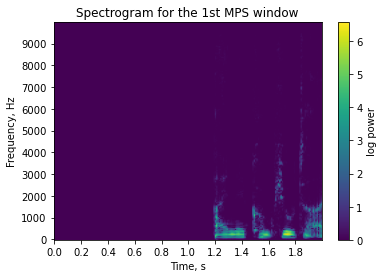

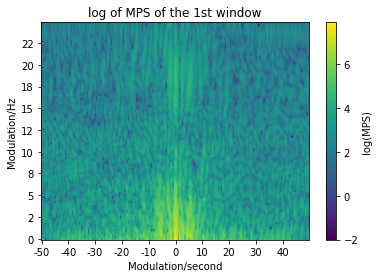

In [2]:
%matplotlib inline
config = {"filepath": "/data/akitaitsev/data1/raw_data/stimuli/0.wav",\
          "sr":20000, "n_fft_stft": 400, "hop_length_stft": 200,\
          "n_fft_mps": 200, "hop_length_mps": 200, "plot_spectr": True, \
          "use_power":True, "log":True, "dB":False, "plot_mps":True, \
          "return_figures": True}
MPS, params, metadata, fig_spectr, fig_mps = mps_stft(**config)

We can see, that spectrogram and its corresponding MPS look quite sane. In the end, this is the only purpose of these figures.
Now, let us examine the main outputs of the function.
Let's check the shape of MPS output:

In [5]:
print(MPS.shape)

(451, 20000)


This means, that given the parameters we have defined for mps_stft function, the output features will have 451 timepoints and 20000 features per timepoint.Note, that 20000 comes from mod/s * mod/Hz, which we can retrieve from *params* output. 

In [6]:
print(params["mps_shape"])

(100, 200)


You may also examine different fields of *params* and *metadata* outputs.

In practice it is easier to run fucntions which require quite a lot of parameters to be specifed with configuration files containing dictionaries with these parameters.
That's why when calling *wav_fiels_to_bids_tsv_mps.py* as main from the bash concole, the function requires to specify only the path to config dictionary saved in .json format.

In [9]:
%%bash
cd audio2bidsstim/
python wav_files_to_bids_tsv_mps.py -h

usage: wav_files_to_bids_tsv_mps.py [-h] [-e EXTRACTOR] [-c CONFIG]
                                    [-o OUTPUT]
                                    [-t START_TIME [START_TIME ...]]
                                    file [file ...]

Wav2bids stim converter.

positional arguments:
  file                  Name of file or space separated list of files or glob
                        expression for wav files to be converted.

optional arguments:
  -h, --help            show this help message and exit
  -e EXTRACTOR, --extractor EXTRACTOR
                        Type of feature extractor to use. mps or mel.
  -c CONFIG, --config CONFIG
                        Path to json file that contains the parameters to
                        librosa's melspectrogram function.
  -o OUTPUT, --output OUTPUT
                        Path to folder where to save tsv and json files, if
                        missing uses current folder.
  -t START_TIME [START_TIME ...], --start-time START_TIME [START_

So, to run feature extraction for a single file we shall just call the file wav_files_to_bids_tsv_mps.py and specify the path to stimulus file, extractor to use (MPS or mel-spectrogram), output folder and (for mel-spectrogram) start times. 

- **run_mps_feature_extraction.sh** allows you to use the abovementioned process of feature extraction with your own config file and folder structure quite easily. It contains the paths to input files, output folder and mps_config file. It executes wav_fiels_to_bids_tsv.py for every wav file and saves feature_representation,parameters and metadata to the output folder. In out case the output folder is 
<br> */data1/raw_data/processed_stimuli/*

In [ ]:
%%bash 
cd /data/akitaitsev/data1/code/audio2bidsstim/
vim run_mps_feature_exraction.sh

## 2. Distribution of stimulus and frmi files on folders according to BIDS standards (data_distribution)
This project is based on prerecorded and preprocessed (aligned) FMRI data. 
So, aligned FMRI data is assumed to be present somewhere on your computer.
This section describes functions which distribute FMRI aligned data and extracted stimulus representation from arbitrary folder to user-defined folder in compliance with BIDS standard.
There are two fucntions in this section.
- **copy_bold_to_bids_folder.py** distributes aligned FRMI BOLD data from arbitrary folder to the folder which will be fed to preprocessing functions from decoding section.

In [1]:
%%bash 
cd /data/akitaitsev/data1/code/data_distribution/
python copy_bold_to_bids_folder.py -h                                           

usage: copy_bold_to_bids_folder.py [-h] [-from FROM_DIR] [-to TO_DIR]

copy aomovoie bold files from aligned folder to your bids folder

optional arguments:
  -h, --help            show this help message and exit
  -from FROM_DIR, --from_dir FROM_DIR
  -to TO_DIR, --to_dir TO_DIR


As we can see the function syntax is very simple: it need the path to the aligned FMRI data folder and a path to your output folder.

- **distribute_stimulus_by_BIDS_folders.py** function does the same for stimulus: it copies stimulus representation files and metadata.json files to user-specified folder.

In [2]:
%%bash 
cd /data/akitaitsev/data1/code/data_distribution/
python distribute_stimulus_by_BIDS_folders.py -h              

usage: distribute_stimulus_by_BIDS_folders.py [-h] [-s STIMULI_DIR]
                                              [-b BIDS_DIR]

Distributer of precessed stimuli files by BIDS standard folders.

optional arguments:
  -h, --help            show this help message and exit
  -s STIMULI_DIR, --stimuli_dir STIMULI_DIR
                        directory where all the stimulus are saved by
                        run_mps_feature_extraction.sh script
  -b BIDS_DIR, --bids_dir BIDS_DIR
                        path to the bids directory


The sintux is the same as in the previous function: you only need to specify path to input directory (the directory to which run_feature_extraction.sh has written its output) and output directory (your BIDS compliant fodler).
*Note, that the output directory of both copy_bold_to_bids_folder and distribute_stimulus_by_BIDS_folders needs to be the same (so that both BOLD and stimulus data is there). 

In case of our project BOLD files and stimulus representation files were distributed to the */data1/processed/* directory. 

## 3. Decoding - reconstruction of stimulus feature representation from preprocessed fmri data (decoding).

Decoding is the core part of this project and it will be discussed in more details compared to the previous sections.
The */code/decoding/* directory contains quite a few scripts. Let us go through them one by one.

### 1) preprocessing.py  <br>
Before running decoding model stimulus and frmi data shall be preprocessed. The script *preprocessing* contains functions for preprocessing. 

- **preprocess_bold_fmri** function applies mask to fmri data and standardize it (removes the mean and scales the variance to 1).
- **get_remove_idx** function returns the rows in lagged stimulus to remove (if lagging shall be done).
- **generate_lagged_stimulus** function does the lagging of fmri data relative to stimulus data.
- **make_X_Y** is the upper level function that actually does the preprocessing. Let us have a closer look at the function.
  

In [3]:
from decoding.preprocessing import make_X_Y
help(make_X_Y)

Help on function make_X_Y in module decoding.preprocessing:

make_X_Y(stimuli, fmri, TR, stim_TR, lag_time=6.0, start_times=None, offset_stim=0.0, fill_value=nan, remove_nans=True)
    Creates (lagged) features and fMRI matrices concatenated along runs
    
    Parameters
    ----------
    stimuli : list, list of stimulus representations
    fmri : list, list of fMRI ndarrays
    TR : int, float, repetition time of the fMRI data in seconds
    stim_TR : int, float, repetition time of the stimulus in seconds
    lag_time : int, float, optional,
               lag to introduce for stimuli in seconds,
               if no lagging should be done set this to TR
    start_times : list, list of int, float, optional,
                  starting time of the stimuli relative to fMRI recordings in seconds
                  appends fill_value to stimulus representation to match fMRI and stimulus
    offset_stim : int, float, optional,
                  time to offset stimulus relative to fMRI in t

As we can see from the description of the function, it accepts list of stimulus represenations and list of fmri data representations, *lag_time*, *start_times*, *offset_stim* and *fill_value*. 
*NOTE, that in this project no lagging of stimulus is done (so *lag_times* are set to fmri TR), *start_times* and *offset_stim* are omitted.
The function returns the tuple of preprocessed stimulus and frmi data which can be fed to decoding model.
In essence, make_X_Y applies *generate_lagged_stimulus* and *get_remove_idx* to every stimuli represenation in the list. If *lag_time*, *start_times* or *offset_stim* are specified they are transmitted to *generate_lagged_stimulus* function. 

- **run_preprocessing** 
This script runs the preprocessing of stimulus and frmi data for every stimulus representation and fmri run of every subject given the BIDS folder structure. The function accepts two inputs: input directory where the stimulus representation and BOLD fmri data are stored and output directory and the output directory. It may contain empty folders for every subject in accordance with the BIDS naming convention (sub-01, sub-02, etc.) or be empty (then the corresponding folder structure will be created).
In essence, *run_preprocessing* calls *preprocess_bold_frmi* for every frmi run of every subject and *make_X_Y* for every stimulus representation without lagging, offset and with start times equaling to zero. Lagging is set to be equal to stimulus repetition time which is read from .json 'stim_description' file from the input directory.

In case of this project *run_preprocessing* is called with the following arguments:
- input_dir = '.../data1/processed/'
- output_dir = '.../data1/lagged/

In [8]:
from decoding.run_preprocessing import run_preprocessing
help(run_preprocessing)

Help on function run_preprocessing in module decoding.run_preprocessing:

run_preprocessing(input_dir, output_dir)
    Function runs preprocessing by calling make_X_Y function for every bold 
    file and its correspondning stimuli file.
    Note, that if the output folder does not exist or does not have subfolder 
    structure (sub-01, etc.) it will be created.
    Inputs:
        input_dir -  path to directory, where the stimuli representation files and
                     bold files are stored
        output_dir - path to directory to store preprocessed stimuli representation 
                     and bold data



### 2) decoding.py
Up to now we were only working with data: creating folder structure, extracting features from stimuli and preprocessing fmri and stimulus representation data. This script is the essence of the current project: it contains function building up into decoding model using ridge regression to reconstruct (predict) feature representation from preprocessed frmi data.
We will go through the function of this script one at a time.

- **get_ridges_and_staff** function returns ridge regression estimates trained on user-specified number of cross validation splits of the data.
  Let us take a look at the fucntion help. 

In [1]:
from decoding.decoding import get_ridges_and_staff
help(get_ridges_and_staff)

Help on function get_ridges_and_staff in module decoding.decoding:

get_ridges_and_staff(X, y, scorers, alphas=[1000], n_splits=8, voxel_selection=True, **kwargs)
    Returns ridge regressions trained in a cross-validation on n_splits of the data, scores on the left-out foldsand predicted data.
    
    Parameters
    ----------
    X : ndarray of shape (samples, features)
    y : ndarray of shape (samples, targets)
    scorers - list of scoring functions to use in (product_moment_corr or any sklearn scoring function 
    alphas : list of floats, optional
             Regularization parameters to be used for Ridge regression
    n_splits : int, optional
    
    voxel_selection : bool, optional, default True
                      Whether to only use voxels with variance larger than zero.
                      This will set scores for these voxels to zero.
    kwargs : additional arguments transferred to ridge_gridsearch_per_target
    
    Returns
    ridges -      list of ridges train

Voxel selection simply eliminates all voxels with zero variance.
<br> 
*Note, that it is potentially problematic to use voxel_selection with the scorer where zero is not the least score.*
<br>
<br>
To get a better idea of how to use the fucntion, let us simulate 2 random numpy arrays and try to reconstruct one from the other.

In [2]:
import numpy as np
X_arr = np.random.randn(50,100)
Y_arr = np.random.randn(50,200)
scorers = ['product_moment_corr', 'mean_squared_error']
alphas = [0,1,10]
n_splits = 8
ridges, scores_dict, pred_data, _ = get_ridges_and_staff(X_arr, Y_arr, scorers, alphas, n_splits)

/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.69706e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/akitaitsev/anaconda3/l

By running the code above we reconstruct Y_arr from X_arr. 
One can make sure that length of ridges correspond to number of cross-validation splits,

In [7]:
print(len(ridges))

8


scores_dict contains field for every scorer fed to the functions, each scorer contains the score of shape (n_splits, n_features) and

In [8]:
print(scores_dict.keys())
print(scores_dict["product_moment_corr"].shape)
print(scores_dict["mean_squared_error"].shape)

dict_keys(['product_moment_corr', 'mean_squared_error'])
(8, 200)
(8, 200)


the prdicted data is of the same shape as the original Y_arr.

In [25]:
print(pred_data.shape)
print(pred_data.shape==Y_arr.shape)

(50, 200)
True


- **reduce_dimensionality** function performs Principal Component Anylysis and allows user to leave components by variance explained. 

In [3]:
from decoding.decoding import reduce_dimensionality 
help(reduce_dimensionality)

Help on function reduce_dimensionality in module decoding.decoding:

reduce_dimensionality(X, var_explained, examine_variance=False, **kwargs)
    Function applys pca with user specified variance explained to the input data
    Inputs:
        X - 2d numpy array (samples/voxels)
        var_explained - float, variabce explained
        examine_variance - logical, whether to run function in interactive mode to manually determine number 
        of components to leave by variance explained plot. Default =Fasle
        kwargs - kwargs for sklearn pca obejct 
    Outputs:
        X_backproj - reduced rand data 
        comp2leave - number of components left



Let us test it on previous numpy arrays with visualization of scree plot (course of eigenvalues).

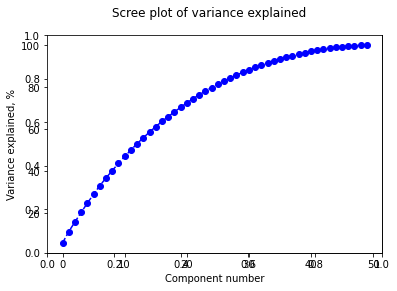

Enter number of components to leave: 40


In [5]:
%matplotlib inline
X_arr_backproj, cmp2leave = reduce_dimensionality(X_arr, var_explained = None, examine_variance=True)

Note, that as our X_arr is random data drawn from the normal distribution there is no sharp decrease in variance explained (which is usual for non-random data). In this example I decided to leave 40 components just for the sake of illustration (see more in scree plot in PCA).

- **compute_correlation** function calculates average correlation of the reconstructed stimulus features with the original ones in every timepoint (sample).
Let us calculate correlation of the simulated X_arr with itself. 
The results shall be of numpy array of ones of shape (X_arr.shape[0], 1).

In [8]:
from decoding.decoding import compute_correlation
corrs = compute_correlation(X_arr, X_arr)
print(corrs.shape)
print(X_arr.shape[0]==corrs.shape[0])

(50, 1)
True


- **plot_mse** function plots mean squared error via python matplotlib.pyplot imshow function and sets modulation power spectrum modulation/second and modulation/Hz units as X and Y axes labels respectively).
- **reshape_mps** function reshapes flattened (in the feature extration step) MPS in accordance with the shape of non-flattened MPS saved to stimulus parameters .json file at the stage of feature extaction. 
- **plot_mps_and_reconstructed_mps** simply plots MPS and reconstructed MPS as 2 subplots one figure with modulation/s and modulation/Hz as axes labels.


- **decode_single_run** function runs the decoding model for a single fmri run and stimulus representation.
Let us take a closer look at the function help.

In [1]:
from decoding.decoding import decode_single_run
help(decode_single_run)

Help on function decode_single_run in module decoding.decoding:

decode_single_run(fmri_path, stimulus_path, alphas, scorers, stim_param_path, do_pca_fmri=False, var_explained=None, **kwargs)
    Runs decoding of single stimulus and fmi run by regressing stimulus representation on bold data via get_ridges_and_staff 
    function (adapted from encoding.py)
    Inputs:
            fmri_path       - str, path to fmri lagged data, output of make_X_Y function
            stimulus_path   - str, path to stimulus representation file
            alphas          - float or list of floats, regularization for ridge, None or list of floats, optional
            scorers         - list of scoring functions to use in get_ridge_plus_scores fucntion
            stim_param_path - str, path to stimulus parameter json file
            do_pca          - logical, whether to do pca on fmri. Default=False
            var_explained   - float, number of components to leave by variance explained for 
            

*decode_single_run* accepts parameters relevant for all the functions mentioned above and outputs ridges objects, list of scores for every user-defiend scorer, predicted (reconstructed) data, average correlation values (one per timepoint) and figures of MSE, correlation and predicted MPS with best, worst and medium reconstruction accuracy.
The function compiles and consequently calls all the decoding functions described above.
<br>Let us try to run it on a single run of a single subject with pca of stimulus representation for the sake of illustration.

/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.29671e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.99584e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/akitaitsev/anaconda3/lib/python3.8/site-packag

/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.76132e-11): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.02909e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.7679e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.11485e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/akitaitsev/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarnin

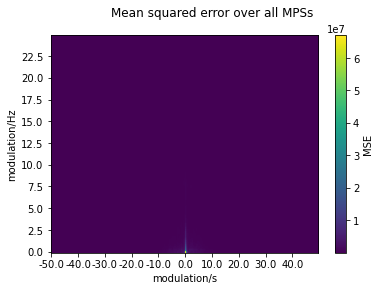

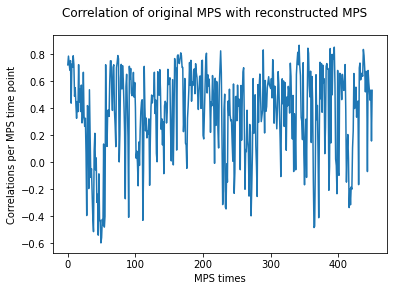

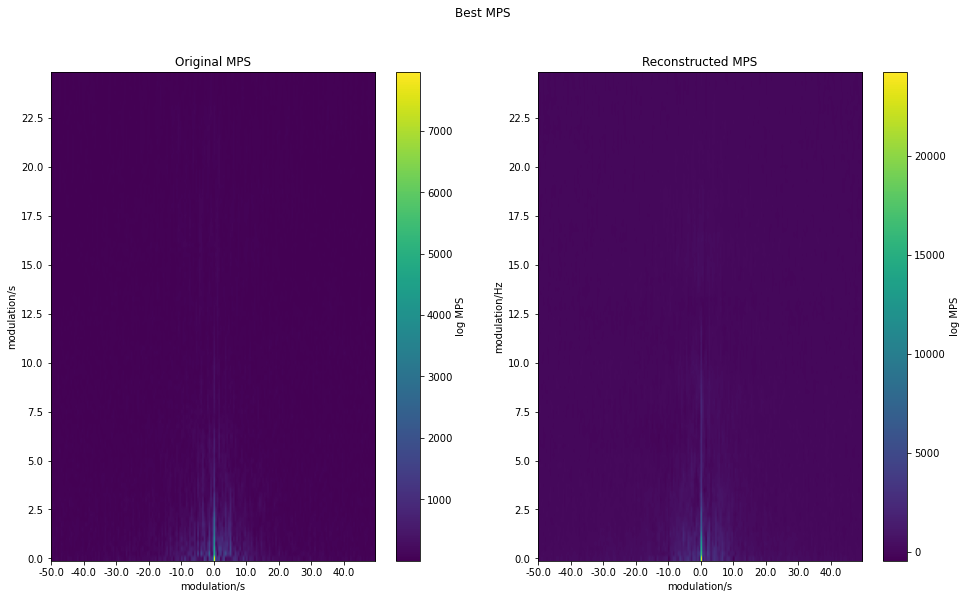

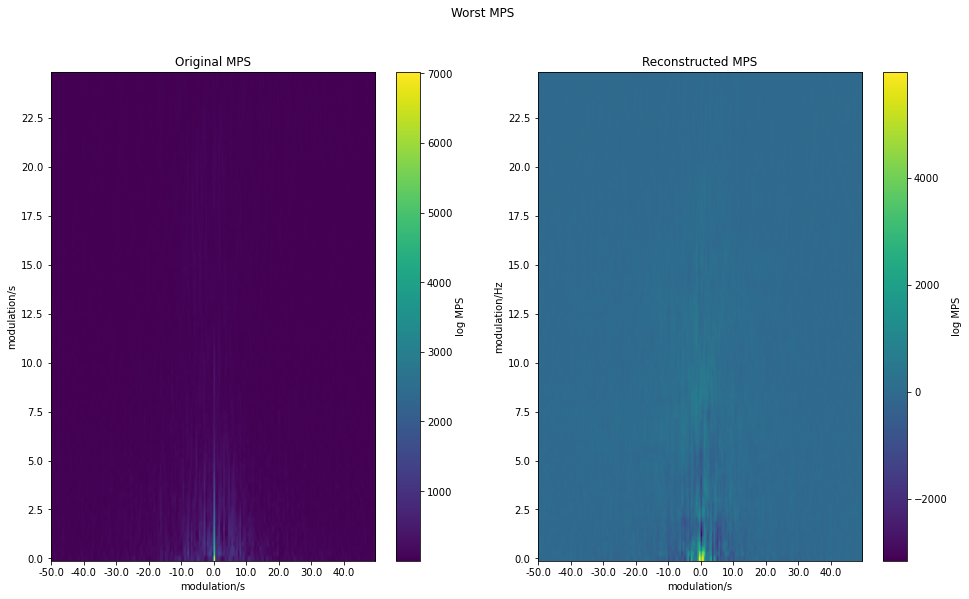

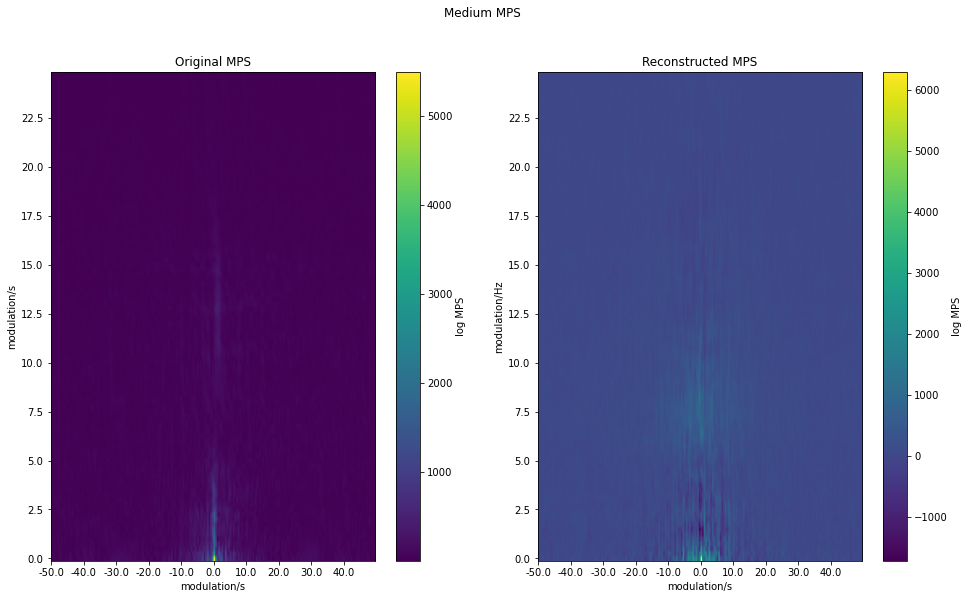

In [3]:
fmri_path = '/data/akitaitsev/data1/lagged/sub-01/sub-01_task-aomovie_run-1_bold.tsv.gz'
stim_path = '/data/akitaitsev/data1/lagged/sub-01/task-aomovie_run-1_stim.tsv.gz'
alphas = [0,1,10]
scorers = ['product_moment_corr', 'mean_squared_error']
stim_param_path = '/data/akitaitsev/data1/raw_data/processed_stimuli/task-aomovie_run-1_stim_parameters.json'
do_pca = True
var_explained = 0.9
ridges, scores, pred_data, corrs, figs = decode_single_run(fmri_path, stim_path, alphas, scorers,\
                                                           stim_param_path, do_pca, var_explained)


Let us now see the figures to get an idea of how well did our model do.

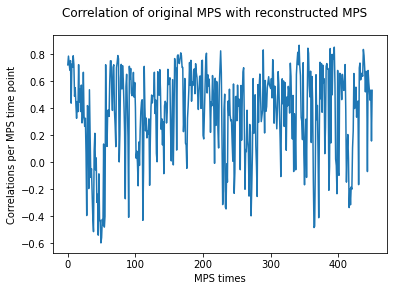

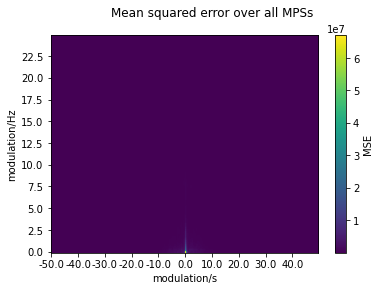

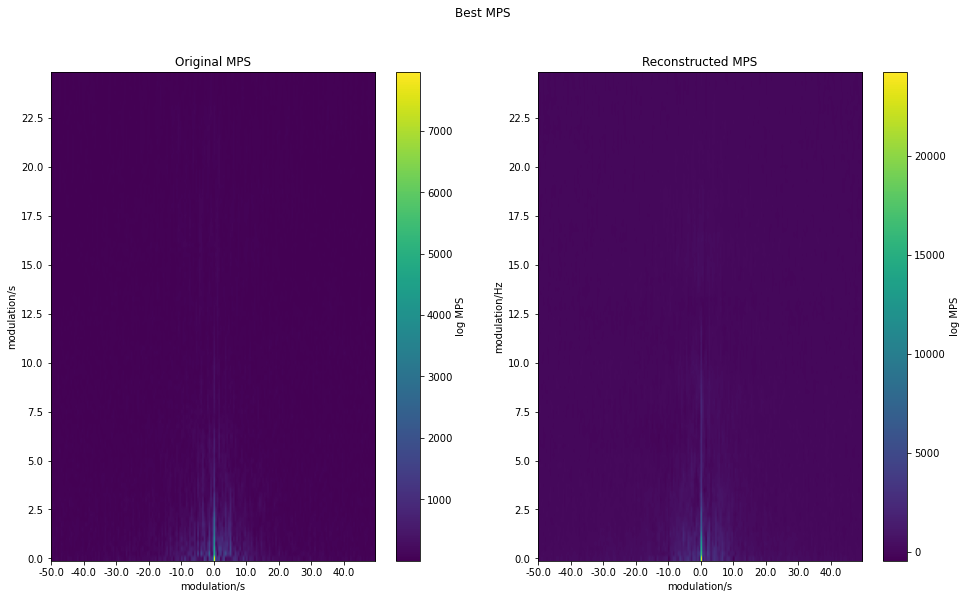

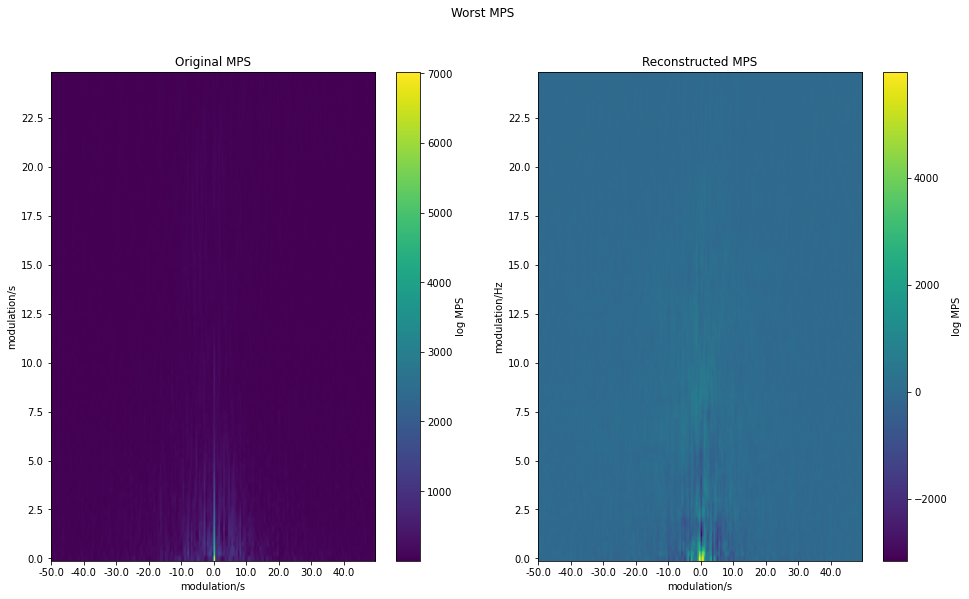

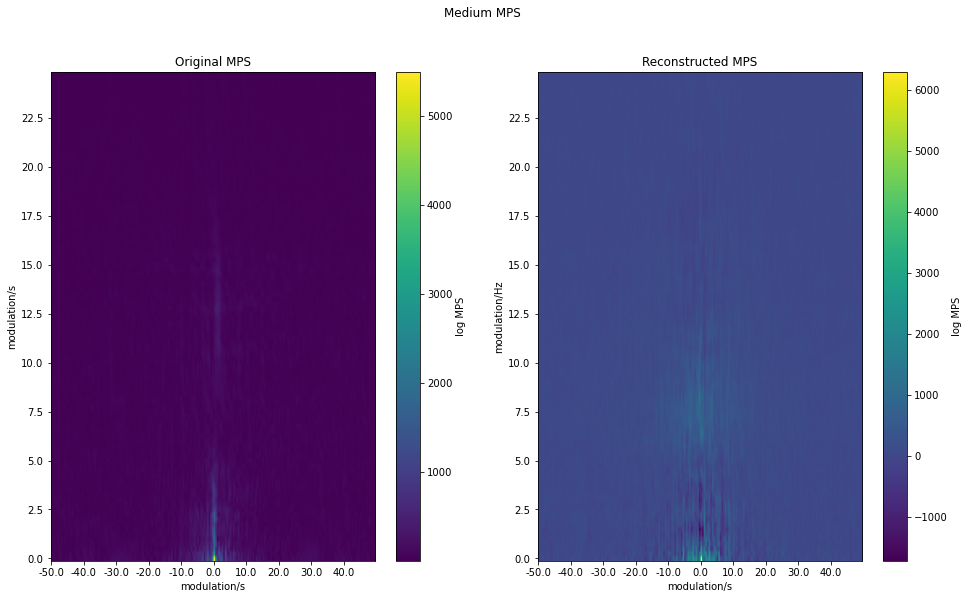

In [17]:
%matplotlib inline
for fig in range(len(figs)):
    display(figs[fig])


As we can see, the graphs look sane and compliant with our intuition: The correlation changes from run to run (which is expected with PCA applied to stimulus representation), MSE is the higher the stronger the magnitude of MPS gets (on the edges it shrinks towards zero) and we can also visually distinguish between best worst and medium MPS and understand, which is which.

- **decoding_model** is the final function of this project which accomodates all abovementioned functions from the decoding section.
  Let us see the function description.

In [1]:
from decoding.decoding import decoding_model
help(decoding_model)

Help on function decoding_model in module decoding.decoding:

decoding_model(inp_data_dir, out_dir, stim_param_dir, subjects, runs, scorers, alphas, do_pca_fmri=False, var_explained=None, **kwargs)
    Function to run decoding on user-specified runs and subjects.
    Inputs:
           
           inp_data_dir  - str - full path to the directory containing preprocessed subject and fmri data
           out_dir       - str, full path to the directory where you want to save results of decoding model.
                           Function takes care of folder structure and creates folders for each subject if 
                           they do not exist
           
           stim_param_dir- str, path to the directory containing stimuli parameters json files for every 
                           specified run
           subjects      - list of strings - subject numbers to run decoding on (note that subjects from 0 
                           to 9 shall 
                           have 0 befo

This function checks runs *decode_single_run* for user specified list of subjects and runs ensures correct folder structure and saves decoding data (outputs of decode single run) in the respectie folder in output directory.

<ins> Finally, to run the decoding model from this project, call the script decoding.py from the bash console with input directory, output directory and path to json configuration file.</ins>

In [1]:
%%bash
cd /data/akitaitsev/data1/code/decoding/
python3 decoding.py -h

usage: decoding.py [-h] [-inp INPUT_DATA_DIR] [-out OUTPUT_DIR]
                   [-config CONFIG_FILE]

Decoding model app. Reconstructs modulation power spectrum 
from aligned preprocessed stimulus and fmri data. User specifies input dir, output dir and config file path. 
Config file shall be .json file containing valid arguments for decoding_model_function. 
Note that the default values are default for decoding parameters if not specified in config file: 
subjects 01, 02, 03, 04, 05, 06, 09, 10, 14, 15, 16, 17, 18, 19, 20 
runs 1, 2, 3, 4, 5, 6, 7, 8 
scorers product_moment_corr, mean_squared_error 
do_pca False 
var_explained None

optional arguments:
  -h, --help            show this help message and exit
  -inp INPUT_DATA_DIR, --input_data_dir INPUT_DATA_DIR
                        Path to preprocessed stimuli and fmri
  -out OUTPUT_DIR, --output_dir OUTPUT_DIR
                        Path to the output directory where the model     data shall be saved. Folder structure can be p

In [ ]:
If no